In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [7]:
def read_in(feat,label): 
    ##Simple read function
    df_x = pd.read_csv(feat)
    x = df_x.values
    
    df_y = pd.read_csv(label)
    y = df_y.values
    return x,y

def plot_raw_digit(feat): 
    '''Takes a feature vector and plots it as an 8x8 pixel image
    Requires that the vector ranges from 0 to 16'''
    plt.gray()
    plt.matshow(feat.reshape(8,8))
    plt.show()
    
def get_mean_variance(X):
    mean = np.mean(X, axis=0) # axis=0: taking means along the
    # vertical line (column)
    # (sum(x_i-\mu)^2)/N
    X_temp = X - mean #
    X_temp_entrypointwise = X_temp*X_temp
    variance = np.mean(X_temp_entrypointwise, axis=0) #axis=0: 
    # taking means along the vertical line (column)
    return mean, variance
    
def normalize_features(X_train, X_test):
    mean, variance = get_mean_variance(X_train)
    variance += 1e-15
    ''' transform the feature '''
    X_train_norm = (X_train - mean)/np.sqrt(variance)
    #math.sqrt doesnot work for numpy
    X_test_norm = (X_test - mean)/np.sqrt(variance)
    return X_train_norm, X_test_norm

def add_column_one(X):
    '''
         convert X -> [1 X]
    '''
    # add  column of ones
    ones = np.ones(X.shape[0])
    ones = ones.reshape(-1, 1)
    X_new = np.append(ones, X, axis=1)

    return X_new    

<Figure size 432x288 with 0 Axes>

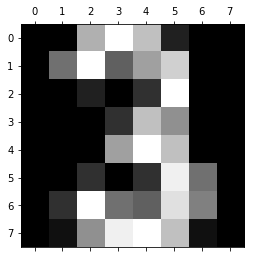

In [9]:
pwd = '/Users/offic/repositories/ml_capstone/gradient_d/data/'
x_train, y_train = read_in(pwd+'Digits_X_train.csv', pwd+'Digits_y_train.csv')
x_test, y_test = read_in(pwd+'Digits_X_test.csv', pwd+'Digits_y_test.csv')

x_train_norm, x_test_norm = normalize_features(x_train,x_test)
x_train_norm_bias, x_test_norm_bias = add_column_one(x_train_norm),add_column_one(x_test_norm)

plot_raw_digit(x_train[0]) ##Yep we got the numbers 

In [ ]:
def predictor(c,x): 
    '''Just a linear combo between coeffients and features'''
    return X.dot(c)

def loss(y_true,y_pred,c, lamb):
    '''Function to be minimzied
    L = norm(c) + K*sum(max(0, 1-y*cT*x))
    '''
    sqC = np.sum(c*c) - c[0]*c[0] ##Remove the bias term in the loss
    hinge = 1-y_true*y_pred
    hinge[hinge<0] = 0 ##eq to a if statement 
    return sqC + lamb*np.sum(hinge)

## THEN GRADIENT DECENT. Just need to add a lambda parameter 

def gradient_desc(x,y,l_rate=.01,ite=100, lamb): 
    '''Input: 
    X-> Features (NxM), normalized w bias
    y->Labels (Nx1)
    learning rate (<<.01)
    Iterations->Number of times to run 
    
    Output: 
    c_n->Optimal coeffs
    loss->loss value based off 
    '''
    n_feat = X.shape[1] ##N value 
    c_n = np.zeros((n_feat,1)) ##initialize an empty matrix 
    loss_range = [0]*ite ##Empty matrix to document how loss changes with iteration
    for i in range(ite): 
        ##Calculate the gradient over a range
        ##Gradient of the loss function, this is the simplified version 
        ## dL/dc = X^t*(y_pred-y_true)
        y_pred = predictor(c_n,x)
        loss_range[i] = loss(y_pred, y,c,lamb).ravel[0] 
        
        grad = np.zeros((n_feat,1))
        grad[1:]+=2*c_n[1:]
        hinge = 1 - y*y_pred
        for i in range(hinge.size):
            if(hinge[i]>0):
                gradient+= (-y[i]*x[i,:].T).reshape
        
    return c_n, loss_range